       Exercise_Time_Min  Healthy_Meals_Per_Day  Sleep_Hours_Per_Night  \
count         200.000000             200.000000             200.000000   
mean           29.592290               2.875000               6.933582   
std             9.310039               1.815449               1.422471   
min             3.802549               0.000000               1.778787   
25%            22.948723               2.000000               5.967243   
50%            29.958081               3.000000               6.972331   
75%            35.008525               4.000000               7.886509   
max            57.201692               9.000000              10.708419   

       Stress_Level         BMI  
count    200.000000  200.000000  
mean       4.995000   25.150008  
std        2.605556    5.070778  
min        1.000000   12.502971  
25%        3.000000   21.458196  
50%        5.000000   25.155662  
75%        7.000000   28.011155  
max        9.000000   37.898547  


C:\Users\neera\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


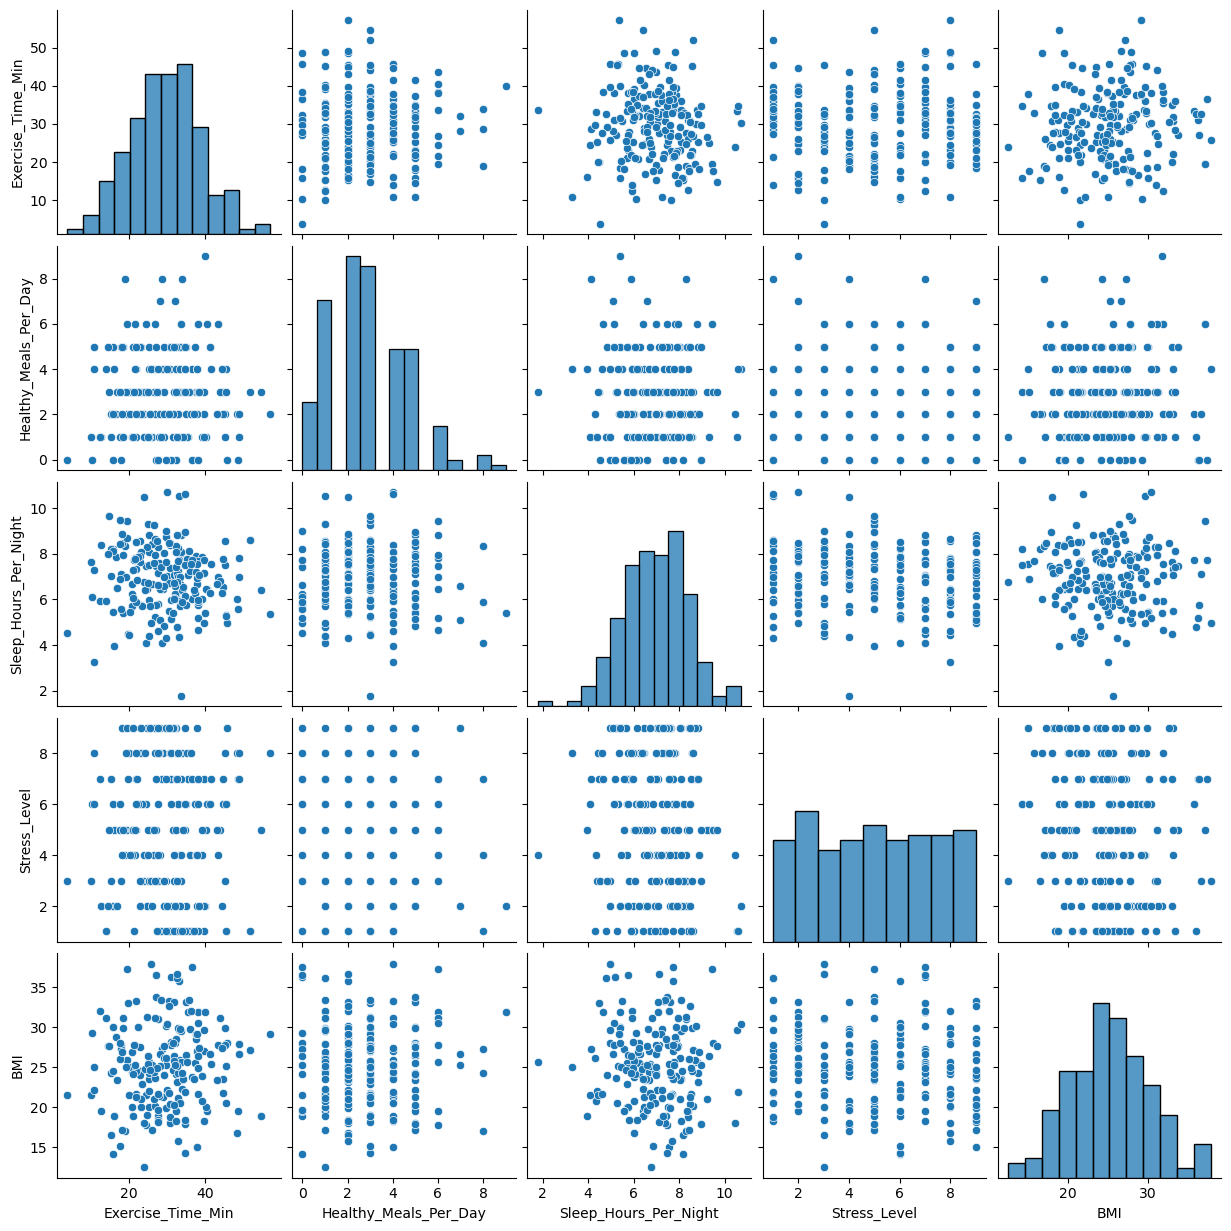

C:\Users\neera\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\neera\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score for K-Means (before PCA): 0.15506407064857652
Silhouette Score for Hierarchical Clustering (before PCA): 0.13628495765267165


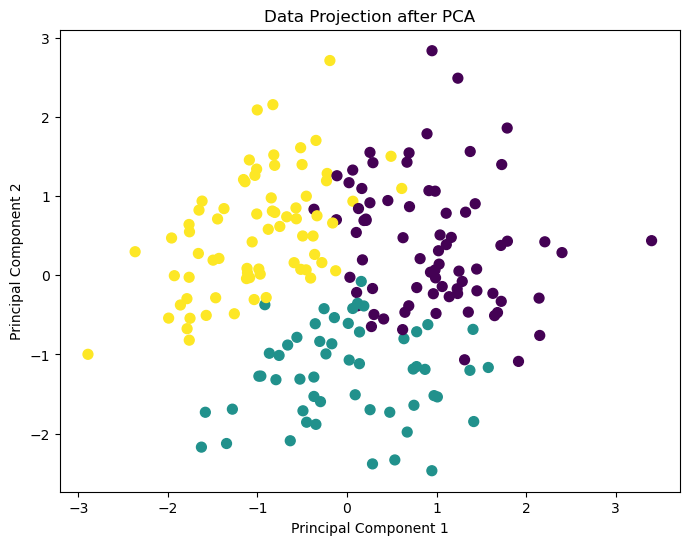

C:\Users\neera\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\neera\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score for K-Means (after PCA): 0.3624879255130832
Silhouette Score for Hierarchical Clustering (after PCA): 0.33440287604087543

Model Comparison:
K-Means Silhouette Score (before PCA): 0.15506407064857652
K-Means Silhouette Score (after PCA): 0.3624879255130832
Hierarchical Clustering Silhouette Score (before PCA): 0.13628495765267165
Hierarchical Clustering Silhouette Score (after PCA): 0.33440287604087543


In [1]:
# Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

# Load dataset
file_path = r'C:\Users\neera\Downloads\simulated_health_wellness_data.csv'
data = pd.read_csv(file_path)

# 1. Exploratory Data Analysis (EDA)
print(data.describe())  # Summary statistics
sns.pairplot(data)  # Pairplot to visualize relationships between features
plt.show()

# 2. Data Preprocessing (Scaling)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# 3. K-Means Clustering before PCA
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Evaluate K-Means using silhouette score
silhouette_kmeans = silhouette_score(scaled_data, kmeans_labels)
print(f"Silhouette Score for K-Means (before PCA): {silhouette_kmeans}")

# 4. Hierarchical Clustering before PCA
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(scaled_data)

# Evaluate Hierarchical Clustering using silhouette score
silhouette_hierarchical = silhouette_score(scaled_data, hierarchical_labels)
print(f"Silhouette Score for Hierarchical Clustering (before PCA): {silhouette_hierarchical}")

# 5. PCA for Dimensionality Reduction
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Plot PCA components
plt.figure(figsize=(8,6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title("Data Projection after PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# 6. K-Means Clustering after PCA
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca_labels = kmeans_pca.fit_predict(pca_data)

# Evaluate K-Means after PCA
silhouette_kmeans_pca = silhouette_score(pca_data, kmeans_pca_labels)
print(f"Silhouette Score for K-Means (after PCA): {silhouette_kmeans_pca}")

# 7. Hierarchical Clustering after PCA
hierarchical_pca = AgglomerativeClustering(n_clusters=3)
hierarchical_pca_labels = hierarchical_pca.fit_predict(pca_data)

# Evaluate Hierarchical Clustering after PCA
silhouette_hierarchical_pca = silhouette_score(pca_data, hierarchical_pca_labels)
print(f"Silhouette Score for Hierarchical Clustering (after PCA): {silhouette_hierarchical_pca}")

# 8. Comparison of Clustering Models
print("\nModel Comparison:")
print(f"K-Means Silhouette Score (before PCA): {silhouette_kmeans}")
print(f"K-Means Silhouette Score (after PCA): {silhouette_kmeans_pca}")
print(f"Hierarchical Clustering Silhouette Score (before PCA): {silhouette_hierarchical}")
print(f"Hierarchical Clustering Silhouette Score (after PCA): {silhouette_hierarchical_pca}")


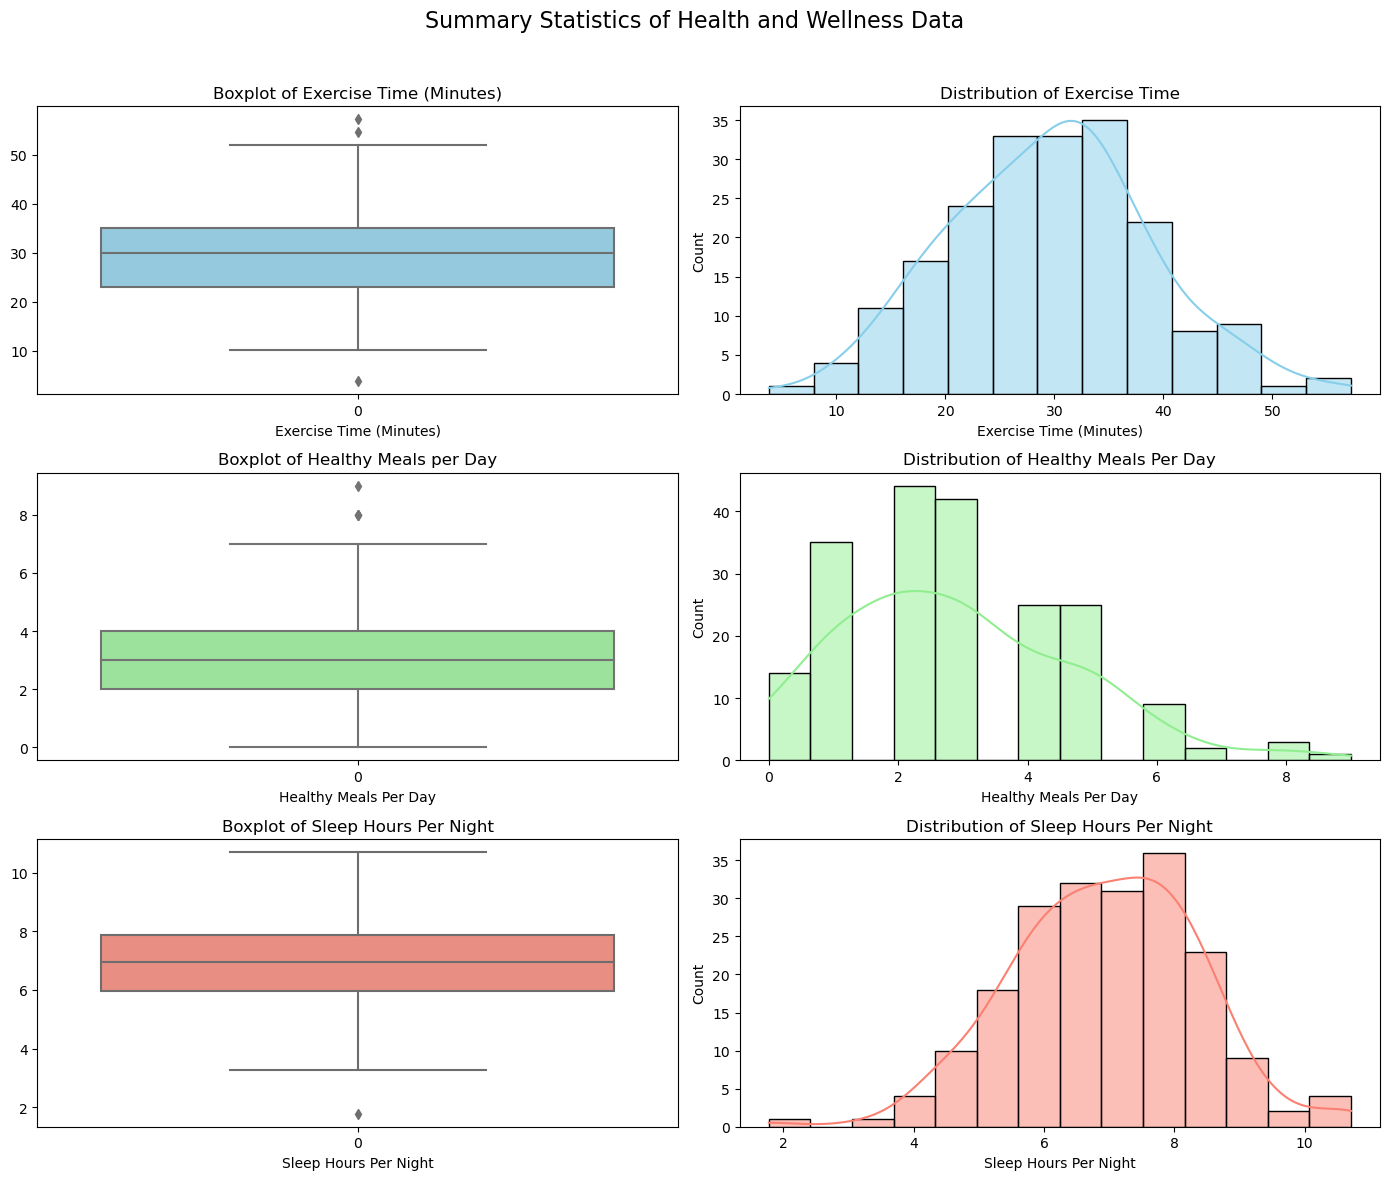

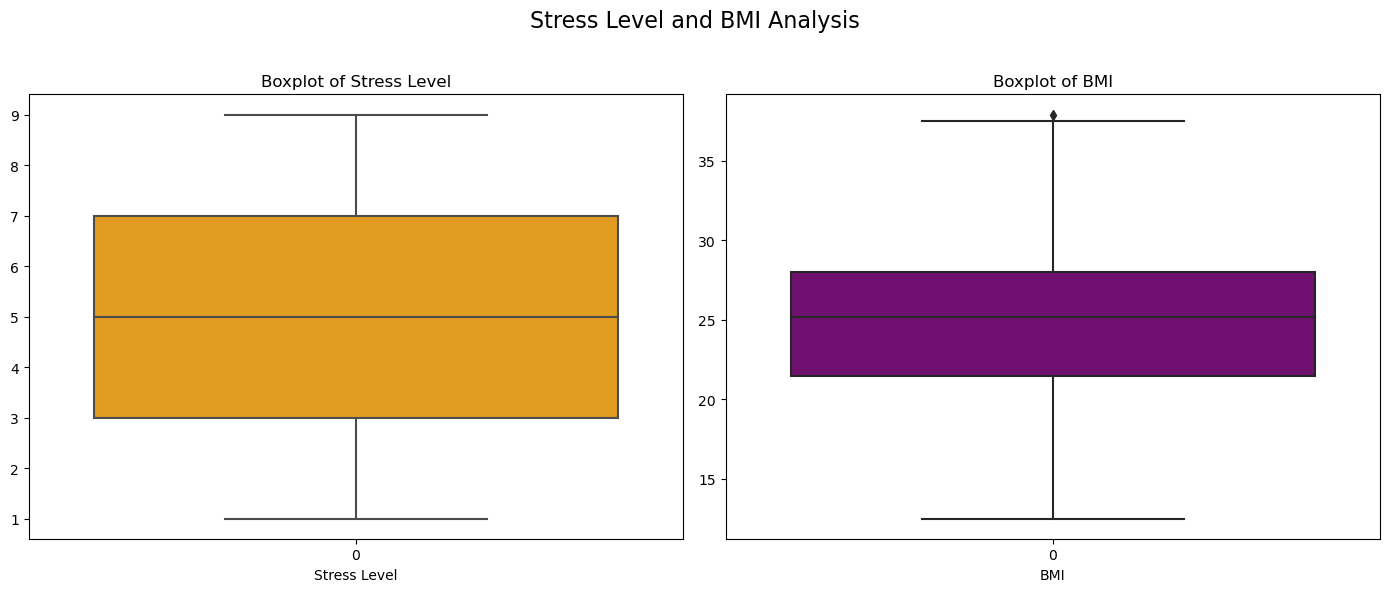

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure for multiple plots
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle('Summary Statistics of Health and Wellness Data', fontsize=16)

# Plot for Exercise Time
sns.boxplot(data['Exercise_Time_Min'], ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Boxplot of Exercise Time (Minutes)')
axes[0, 0].set_xlabel('Exercise Time (Minutes)')

sns.histplot(data['Exercise_Time_Min'], kde=True, ax=axes[0, 1], color='skyblue')
axes[0, 1].set_title('Distribution of Exercise Time')
axes[0, 1].set_xlabel('Exercise Time (Minutes)')

# Plot for Healthy Meals per Day
sns.boxplot(data['Healthy_Meals_Per_Day'], ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Boxplot of Healthy Meals per Day')
axes[1, 0].set_xlabel('Healthy Meals Per Day')

sns.histplot(data['Healthy_Meals_Per_Day'], kde=True, ax=axes[1, 1], color='lightgreen')
axes[1, 1].set_title('Distribution of Healthy Meals Per Day')
axes[1, 1].set_xlabel('Healthy Meals Per Day')

# Plot for Sleep Hours Per Night
sns.boxplot(data['Sleep_Hours_Per_Night'], ax=axes[2, 0], color='salmon')
axes[2, 0].set_title('Boxplot of Sleep Hours Per Night')
axes[2, 0].set_xlabel('Sleep Hours Per Night')

sns.histplot(data['Sleep_Hours_Per_Night'], kde=True, ax=axes[2, 1], color='salmon')
axes[2, 1].set_title('Distribution of Sleep Hours Per Night')
axes[2, 1].set_xlabel('Sleep Hours Per Night')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Plot for Stress Level and BMI
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Stress Level and BMI Analysis', fontsize=16)

# Plot for Stress Level
sns.boxplot(data['Stress_Level'], ax=axes[0], color='orange')
axes[0].set_title('Boxplot of Stress Level')
axes[0].set_xlabel('Stress Level')

sns.boxplot(data['BMI'], ax=axes[1], color='purple')
axes[1].set_title('Boxplot of BMI')
axes[1].set_xlabel('BMI')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
